In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import seaborn as sn

In [2]:
# Read in DataSet and clean nan inputs
starOrignialDF= pd.read_csv('pulsarStarData.csv', encoding = 'utf8')
starOrignialDF=starOrignialDF.dropna()

In [3]:
# Rename target column for prediction
starOrignialDF.rename(columns={'target_class': 'Pulsar_Star'}, inplace=True)
starOrignialDF.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,Pulsar_Star
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [4]:
from sklearn.ensemble import RandomForestClassifier

In [5]:
starOrignialDF.data = starOrignialDF.drop("Pulsar_Star", axis=1)
starOrignialDF.target = starOrignialDF["Pulsar_Star"]

C:\Users\caraa\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.
C:\Users\caraa\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [6]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(starOrignialDF.data, starOrignialDF.target)
rf.score(starOrignialDF.data, starOrignialDF.target)

1.0

In [7]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf.feature_importances_
importances

array([0.16830145, 0.04797262, 0.34955817, 0.2204694 , 0.06978658,
       0.05669776, 0.04487887, 0.04233514])

In [8]:
# We can sort the features by their importance
forestResult = sorted(zip(rf.feature_importances_, starOrignialDF), reverse=True)
forestResult

[(0.3495581738270155, ' Excess kurtosis of the integrated profile'),
 (0.22046939806065688, ' Skewness of the integrated profile'),
 (0.1683014517479193, 'Mean of the integrated profile'),
 (0.06978658320936937, ' Mean of the DM-SNR curve'),
 (0.056697763319157254, ' Standard deviation of the DM-SNR curve'),
 (0.04797262024863497, ' Standard deviation of the integrated profile'),
 (0.044878873766833506, ' Excess kurtosis of the DM-SNR curve'),
 (0.0423351358204133, ' Skewness of the DM-SNR curve')]

In [9]:
importanceRatio_DF= pd.DataFrame({
                          "Importance Rating":importances})
importanceRatio_DF

# To sort from highest to lowest, ascending=False must be passed in & resest index
descendingImportanceRatio_DF= importanceRatio_DF.sort_values("Importance Rating", ascending=False).reset_index(drop=True)
descendingImportanceRatio_DF.head(8)

,Importance Rating
0,0.349558
1,0.220469
2,0.168301
3,0.069787
4,0.056698
5,0.047973
6,0.044879
7,0.042335


In [10]:
descendingFeatures= ['Excess kurtosis of the integrated profile',' Skewness of the integrated profile',
                     'Mean of the integrated profile',' Mean of the DM-SNR curve',
                     ' Standard deviation of the DM-SNR curve',' Standard deviation of the integrated profile',
                     ' Skewness of the DM-SNR curve',' Excess kurtosis of the DM-SNR curve']

In [11]:
decendingRating= descendingImportanceRatio_DF['Importance Rating']
decendingRating.head(3)

0    0.349558
1    0.220469
2    0.168301
Name: Importance Rating, dtype: float64

In [12]:
# intialise data of lists. 
data = {"Prediction_Importance_Feature":descendingFeatures,
        'Importance_Rating':decendingRating} 
  
# Create DataFrame 
print('               Importance Features')
print('           __________________________')

finalImportance_df= pd.DataFrame(data) 
finalImportance_df

               Importance Features
           __________________________


,Prediction_Importance_Feature,Importance_Rating
0,Excess kurtosis of the integrated profile,0.349558
1,Skewness of the integrated profile,0.220469
2,Mean of the integrated profile,0.168301
3,Mean of the DM-SNR curve,0.069787
4,Standard deviation of the DM-SNR curve,0.056698
5,Standard deviation of the integrated profile,0.047973
6,Skewness of the DM-SNR curve,0.044879
7,Excess kurtosis of the DM-SNR curve,0.042335


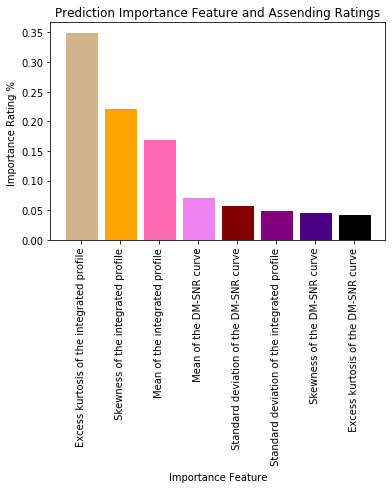

In [13]:
# Bar Plots
X_axis = finalImportance_df['Prediction_Importance_Feature']
y_axis = finalImportance_df['Importance_Rating']

barList = plt.bar(X_axis,y_axis)
#colors 
barList[0].set_color('tan')
barList[1].set_color('orange')
barList[2].set_color('hotpink')
barList[3].set_color('violet')
barList[4].set_color('maroon')
barList[5].set_color('purple')
barList[6].set_color('indigo')
barList[7].set_color('black')
# Orient widths. Add labels, tick marks, etc. 
plt.title("Prediction Importance Feature and Assending Ratings")
plt.ylabel("Importance Rating % ")
plt.xlabel("Importance Feature")
plt.xticks(np.arange(0,8,1))
plt.xticks(rotation=90)

# Show the Figure
plt.show()

In [14]:
# To sort from lowest to highest for adjusting horizontal barchart, ascending=True must be passed in & resest index 
newImportance_df= finalImportance_df.sort_values("Importance_Rating", ascending=True).reset_index(drop=True)
newImportance_df.head(8)

,Prediction_Importance_Feature,Importance_Rating
0,Excess kurtosis of the DM-SNR curve,0.042335
1,Skewness of the DM-SNR curve,0.044879
2,Standard deviation of the integrated profile,0.047973
3,Standard deviation of the DM-SNR curve,0.056698
4,Mean of the DM-SNR curve,0.069787
5,Mean of the integrated profile,0.168301
6,Skewness of the integrated profile,0.220469
7,Excess kurtosis of the integrated profile,0.349558


Text(0.5, 1.0, 'Prediction Importance Feature and Assending Ratings')

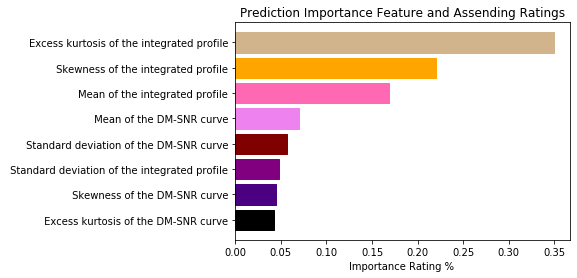

In [15]:
X_axis = newImportance_df['Prediction_Importance_Feature']
y_axis = newImportance_df['Importance_Rating']
barList = plt.barh(X_axis, y_axis)
#colors 
barList[0].set_color('black')
barList[1].set_color('indigo')
barList[2].set_color('purple')
barList[3].set_color('maroon')
barList[4].set_color('violet')
barList[5].set_color('hotpink')
barList[6].set_color('orange')
barList[7].set_color('tan')



plt.xlabel("Importance Rating % ")
plt.title("Prediction Importance Feature and Assending Ratings")

In [16]:
# d= starOrignialDF["Pulsar_Star"].astype(str)
# d

In [17]:
# Assign the data to X and y

X =starOrignialDF.drop("Pulsar_Star", axis=1)
y = starOrignialDF["Pulsar_Star"]
print(X.shape, y.shape)

(17898, 8) (17898,)


In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [19]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [20]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.9810055865921787


In [21]:
print(f"DEFAULT OUTCOME KEY: (Pulsar YES: 1 , Pulsar NO: 0 )")
print(f"------------------------------------------------------")
print(f"Predicted Outcome: {y_pred}")
print(f"Actual Outcome: {list(y_test[:])}")

DEFAULT OUTCOME KEY: (Pulsar YES: 1 , Pulsar NO: 0 )
------------------------------------------------------
Predicted Outcome: [0 1 0 ... 0 0 0]
Actual Outcome: [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0

In [22]:
from pandas_ml import ConfusionMatrix

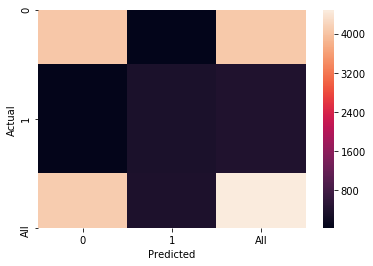

In [23]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins = True)
sn.heatmap(confusion_matrix, annot=False)

In [24]:
confusion_matrix.describe()

Predicted,0,1,All
count,3.000000,3.000000,3.000000
mean,2734.666667,248.666667,2983.333333
std,2318.242725,192.443065,2242.883040
min,58.000000,27.000000,404.000000
25%,2051.000000,186.500000,2237.500000
50%,4044.000000,346.000000,4071.000000
75%,4073.000000,359.500000,4273.000000
max,4102.000000,373.000000,4475.000000


In [25]:
data = {'y_Act':y_test,
        'y_Pred': y_pred
        }

matrix_df = pd.DataFrame(data, columns=['y_Act','y_Pred'])
Confusion_Matrix = ConfusionMatrix(matrix_df['y_Act'], matrix_df['y_Pred'])
Confusion_Matrix.print_stats()

population: 4475
P: 404
N: 4071
PositiveTest: 373
NegativeTest: 4102
TP: 346
TN: 4044
FP: 27
FN: 58
TPR: 0.8564356435643564
TNR: 0.993367722918202
PPV: 0.9276139410187667
NPV: 0.9858605558264262
FPR: 0.006632277081798084
FDR: 0.07238605898123325
FNR: 0.14356435643564355
ACC: 0.9810055865921787
F1_score: 0.8906048906048906
MCC: 0.8810639605698364
informedness: 0.8498033664825584
markedness: 0.9134744968451929
prevalence: 0.09027932960893854
LRP: 129.13146314631464
LRN: 0.14452287216852247
DOR: 893.5019157088125
FOR: 0.014139444173573866
